C:\Users\ashim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.1798 - val_loss: 0.0940
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1415 - val_loss: 0.0725
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1208 - val_loss: 0.0560
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1023 - val_loss: 0.0440
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0891 - val_loss: 0.0361
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0727 - val_loss: 0.0326
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0650 - val_loss: 0.0321
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0581 - val_loss: 0.0345
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0516 - val_loss: 0.0383
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0486 - val_loss: 0.0441
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0459 - val_loss: 0.0504
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0443 - val_l

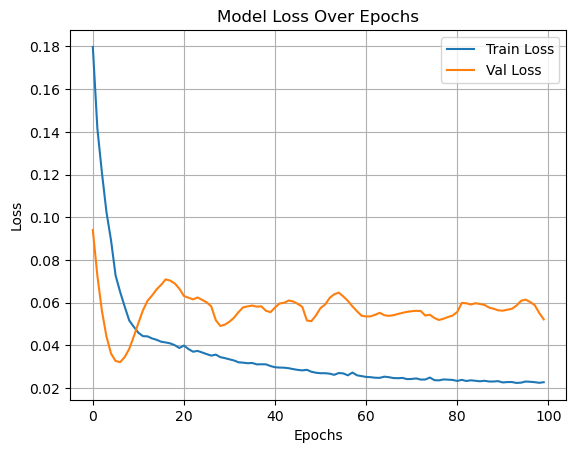

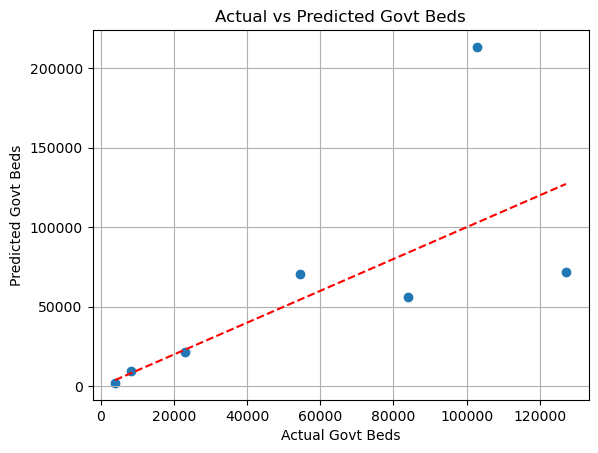

In [1]:
#exp1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

beds_df = pd.read_csv(r"C:\Users\ashim\Downloads\hospital_beds.csv")
cases_df = pd.read_csv(r"C:\Users\ashim\Downloads\Latest Covid-19 India Status.csv")

cases_df.rename(columns={'State/UTs': 'State', 'Total Cases': 'Confirmed', 'Discharged': 'Recovered Cases'}, inplace=True)
beds_df.rename(columns={'States': 'State', 'Total hospital beds': 'Govt Beds'}, inplace=True)

cases_df = cases_df.drop_duplicates(subset='State', keep='last')
merged_df = pd.merge(cases_df, beds_df, on='State')
merged_df = merged_df.dropna(subset=['Confirmed', 'Recovered Cases', 'Deaths', 'Govt Beds'])

for col in ['Confirmed', 'Recovered Cases', 'Deaths', 'Govt Beds']:
    merged_df[col] = merged_df[col].astype(str).str.replace(',', '').astype(float)

X = merged_df[['Confirmed', 'Recovered Cases', 'Deaths']]
y = merged_df['Govt Beds']

scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}")

y_pred = model.predict(X_test)
y_pred_unscaled = scaler_y.inverse_transform(y_pred)
y_test_unscaled = scaler_y.inverse_transform(y_test)

r2 = r2_score(y_test_unscaled, y_pred_unscaled)
print(f"R² Score: {r2:.4f}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(y_test_unscaled, y_pred_unscaled)
plt.plot([y_test_unscaled.min(), y_test_unscaled.max()],
         [y_test_unscaled.min(), y_test_unscaled.max()],
         color='red', linestyle='--')
plt.xlabel('Actual Govt Beds')
plt.ylabel('Predicted Govt Beds')
plt.title('Actual vs Predicted Govt Beds')
plt.grid(True)
plt.show()

C:\Users\ashim\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ashim\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ashim\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ashim\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ashim\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

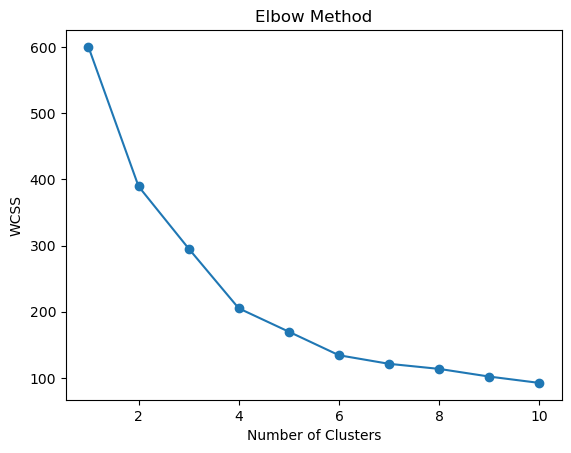

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



--- Customer Segmentation Results ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


C:\Users\ashim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6058 - loss: 0.6480 - val_accuracy: 0.7324 - val_loss: 0.4971
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7632 - loss: 0.4668 - val_accuracy: 0.7693 - val_loss: 0.4575
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7875 - loss: 0.4407 - val_accuracy: 0.7757 - val_loss: 0.4463
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7978 - loss: 0.4292 - val_accuracy: 0.7835 - val_loss: 0.4401
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8000 - loss: 0.4234 - val_accuracy: 0.7885 - val_loss: 0.4352
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8033 - loss: 0.4201 - val_accuracy: 0.7899 - val_loss: 0.4329
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8056 - loss: 0.4171 - val_accuracy: 0.7906 - val_loss: 0.4305
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.4150 - val_accuracy: 0.

In [2]:
#exp2
# -------------------- Part 1: Customer Segmentation (Unsupervised) --------------------
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Mall Customers dataset
df = pd.read_csv("C:/Users/ashim/Downloads/Mall_Customers.csv")

# Select relevant features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans (say 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\n--- Customer Segmentation Results ---")
print(df.head())


# -------------------- Part 2: Binary Classification ANN (Telco Churn) --------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load Telco dataset
telco = pd.read_csv("C:/Users/ashim/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Clean numeric column
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
telco['TotalCharges'] = telco['TotalCharges'].fillna(telco['TotalCharges'].median())

# Encode categorical features
le = LabelEncoder()
for col in ['gender','Partner','Dependents','PhoneService','MultipleLines',
            'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','Contract',
            'PaperlessBilling','PaymentMethod']:
    telco[col] = le.fit_transform(telco[col])

# Target encoding
telco['Churn'] = telco['Churn'].map({'Yes':1, 'No':0})

X = telco.drop(['customerID','Churn'], axis=1)
y = telco['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN model (binary)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\n--- Binary Classification (Telco Churn) ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [3]:
# 1. Import Libraries
# --------------------------------------
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# --------------------------------------
# 2. Load Dataset
# --------------------------------------
df = pd.read_csv("C:/Users/ashim/Downloads/Train.csv")

print("First rows of dataset:")
print(df.head())

# --------------------------------------
# 3. Preprocessing
# --------------------------------------

# Target column
target_col = "Segmentation"

# Split features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode target labels (Cat_1, Cat_2, etc.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-Hot Encode target for ANN
y_onehot = tf.keras.utils.to_categorical(y_encoded)

# Separate categorical and numerical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# One-Hot Encode categorical features
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_categorical = encoder.fit_transform(X[categorical_cols])

# Scale numerical features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_cols])

# Combine processed features
X_processed = np.hstack([X_numerical, X_categorical])

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_onehot, test_size=0.2, random_state=42, stratify=y_onehot
)

# --------------------------------------
# 4. Handle Class Imbalance
# --------------------------------------
classes = np.unique(y_encoded)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_encoded
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# --------------------------------------
# 5. Build ANN Model
# --------------------------------------
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(y_onehot.shape[1], activation="softmax")  # softmax for multiclass
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# --------------------------------------
# 6. Train Model
# --------------------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    verbose=1
)

# --------------------------------------
# 7. Evaluate
# --------------------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Convert back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_true_labels = label_encoder.inverse_transform(y_true_classes)

print("\nPredicted Classes:", y_pred_labels[:10])
print("Actual Classes:   ", y_true_labels[:10])

First rows of dataset:
       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  
Class Weights: {0: 1.0228194726166329, 1: 1.0855758880516684, 2: 1.0238578680203045, 3: 0.8893298059964727}
Epoch 1/50


C:\Users\ashim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2454 - loss: 1.3879 - val_accuracy: 0.2239 - val_loss: 1.3865
Epoch 2/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2264 - loss: 1.3876 - val_accuracy: 0.2424 - val_loss: 1.3871
Epoch 3/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2318 - loss: 1.3875 - val_accuracy: 0.2424 - val_loss: 1.3874
Epoch 4/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2287 - loss: 1.3875 - val_accuracy: 0.2316 - val_loss: 1.3876
Epoch 5/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2460 - loss: 1.3875 - val_accuracy: 0.2316 - val_loss: 1.3875
Epoch 6/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2315 - loss: 1.3874 - val_accuracy: 0.2316 - val_loss: 1.3875
Epoch 7/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2415 - loss: 1.3876 - val_accuracy: 0.2316 - val_loss: 1.3873
Epoch 8/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2440 - loss: 1.3875 - val_accuracy: 0.2316 - val_

Epoch 1/50


C:\Users\ashim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5685 - loss: 1.0329 - val_accuracy: 0.6615 - val_loss: 0.9278
Epoch 2/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6518 - loss: 0.8557 - val_accuracy: 0.6948 - val_loss: 0.7716
Epoch 3/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6752 - loss: 0.7849 - val_accuracy: 0.7095 - val_loss: 0.7163
Epoch 4/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7023 - loss: 0.7289 - val_accuracy: 0.7235 - val_loss: 0.6798
Epoch 5/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7153 - loss: 0.6911 - val_accuracy: 0.7405 - val_loss: 0.6301
Epoch 6/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7325 - loss: 0.6408 - val_accuracy: 0.7444 - val_loss: 0.6090
Epoch 7/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7399 - loss: 0.6333 - val_accuracy: 0.7668 - val_loss: 0.5900
Epoch 8/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7585 - loss: 0.6023 - val_accuracy: 0.7607 - val_

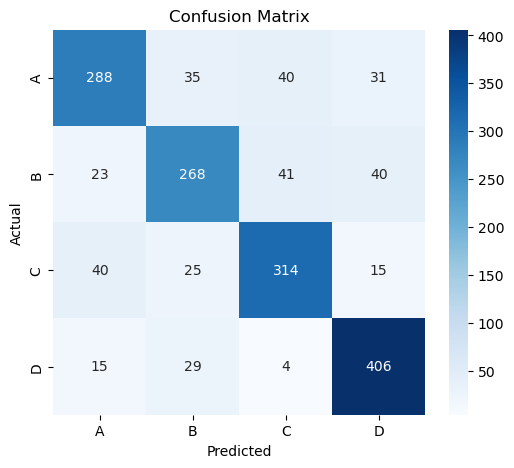


Classification Report:
              precision    recall  f1-score   support

           A       0.79      0.73      0.76       394
           B       0.75      0.72      0.74       372
           C       0.79      0.80      0.79       394
           D       0.83      0.89      0.86       454

    accuracy                           0.79      1614
   macro avg       0.79      0.79      0.79      1614
weighted avg       0.79      0.79      0.79      1614



In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# =======================
# Load & preprocess data
# =======================
df = pd.read_csv("C:/Users/ashim/Downloads/Train_modified_numeric.csv")

# Drop ID column
df = df.drop(columns=["ID"])

# Handle missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Separate features and target
X = df.drop(columns=["Segmentation"])
y = df["Segmentation"]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

# =======================
# Build Improved ANN
# =======================
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation="relu"),
    Dense(y_train_cat.shape[1], activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy", metrics=["accuracy"])


# Train model
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate model
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Decode labels back to A, B, C, D
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Show first 10 predictions vs actual
print("\nPredicted Classes:", y_pred_labels[:10])
print("Actual Classes:   ", y_test_labels[:10])

# Confusion Matrix & Report
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")S
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=le.classes_))


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, models

# -----------------------------
# 1. Set folder path and image size
# -----------------------------
folder = r"C:\Users\ashim\Downloads\Merge_set" # Update with your folder path
img_size = (128, 128)

# -----------------------------
# 2. Create CSV from folder (if not already created)
# -----------------------------
csv_path = os.path.join(folder, "dataset.csv")

if not os.path.exists(csv_path):
    data = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                if "cat" in file.lower():
                    label = 0
                elif "dog" in file.lower():
                    label = 1
                else:
                    continue
                filepath = os.path.join(root, file)
                data.append([filepath, label])
    df_csv = pd.DataFrame(data, columns=["filename", "label"])
    df_csv.to_csv(csv_path, index=False)
    print(f"✅ CSV created at: {csv_path}")
else:
    print(f"✅ CSV already exists at: {csv_path}")

# -----------------------------
# 3. Load images and labels from CSV
# -----------------------------
df = pd.read_csv(csv_path)
images = []
labels = []

for _, row in df.iterrows():
    if os.path.exists(row["filename"]):
        img = load_img(row["filename"], target_size=img_size)
        img_array = img_to_array(img) / 255.0  # normalize
        images.append(img_array)
        labels.append(row["label"])

images = np.array(images, dtype="float32")
labels = np.array(labels, dtype="int")
print("✅ Data Loaded:", images.shape, labels.shape)

# -----------------------------
# 4. Train-Test Split
# -----------------------------
X_train, X_val, y_train, y_val = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# -----------------------------
# 5. Build CNN Model
# -----------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# -----------------------------
# 6. Train Model
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# -----------------------------
# 7. Evaluate Model
# -----------------------------
# Predictions
y_pred_prob = model.predict(X_val).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


✅ CSV already exists at: C:\Users\ashim\Downloads\Merge_set\dataset.csv
✅ Data Loaded: (1015, 128, 128, 3) (1015,)


C:\Users\ashim\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.5012 - loss: 0.7043 - val_accuracy: 0.5172 - val_loss: 0.6924
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.5419 - loss: 0.6890 - val_accuracy: 0.5222 - val_loss: 0.6896
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.5382 - loss: 0.6914 - val_accuracy: 0.5911 - val_loss: 0.6857
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.5825 - loss: 0.6716 - val_accuracy: 0.6601 - val_loss: 0.6351
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.6441 - loss: 0.6339 - val_accuracy: 0.6502 - val_loss: 0.5888
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.6798 - loss: 0.5810 - val_accuracy: 0.6650 - val_loss: 0.6037
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.7254 - loss: 0.5545 - val_accuracy: 0.6158 - val_loss: 0.6654
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.7611 - loss: 0.5001 - val_accuracy: 0.

Found 5817 images belonging to 15 classes.
Found 1445 images belonging to 15 classes.
Found 899 images belonging to 15 classes.
Classes: ['Armadilles', 'Bear', 'Birds', 'Cow', 'Crocodile', 'Deer', 'Elephant', 'Goat', 'Horse', 'Jaguar', 'Monkey', 'Rabbit', 'Skunk', 'Tiger', 'Wild Boar']


C:\Users\ashim\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.7650 - loss: 0.8033 - val_accuracy: 0.8830 - val_loss: 0.3757
Epoch 2/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 1906s 11s/step - accuracy: 0.8657 - loss: 0.4258 - val_accuracy: 0.8962 - val_loss: 0.3360
Epoch 3/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 2046s 11s/step - accuracy: 0.8804 - loss: 0.3836 - val_accuracy: 0.9066 - val_loss: 0.3093
Epoch 4/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 1508s 8s/step - accuracy: 0.8822 - loss: 0.3560 - val_accuracy: 0.8969 - val_loss: 0.3116
Epoch 5/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 1331s 7s/step - accuracy: 0.8972 - loss: 0.3249 - val_accuracy: 0.8983 - val_loss: 0.3026
Epoch 6/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.8982 - loss: 0.3158 - val_accuracy: 0.9024 - val_loss: 0.3156
Epoch 7/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.8998 - loss: 0.3046 - val_accuracy: 0.8920 - val_loss: 0.3254
Epoch 8/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.9015 - loss: 0.3040 - va

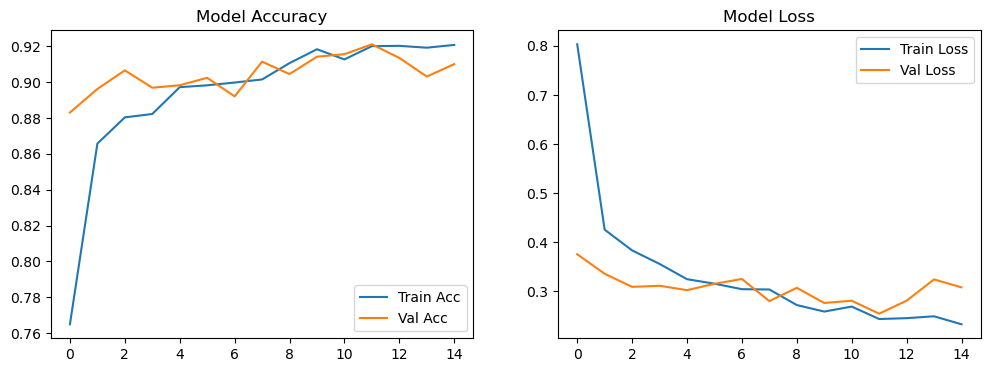

29/29 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9155 - loss: 0.2931
Test Accuracy: 0.9154615998268127
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 970ms/step


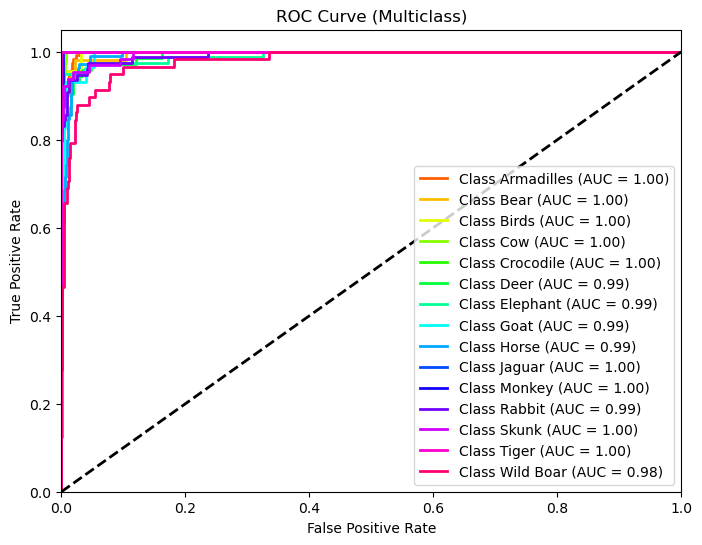

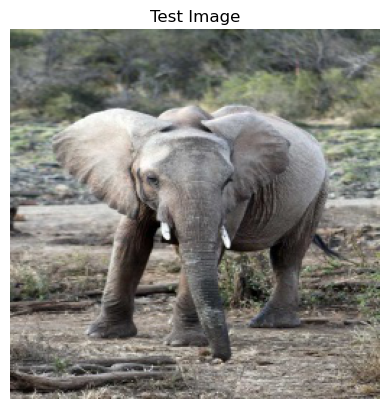

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Elephant
Actual Class: Elephant


In [1]:
# EXPERIMENT 4 - Transfer Learning with MobileNetV2 + ROC Curve

# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing import image

# 2. Data Preprocessing
img_size = 224   # MobileNetV2 default
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.8,1.2],
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    "dataset/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    "dataset/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

test_data = datagen.flow_from_directory(
    "dataset/test",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

num_classes = train_data.num_classes
class_labels = list(train_data.class_indices.keys())
print("Classes:", class_labels)


# 3. Build Transfer Learning Model (MobileNetV2)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(img_size,img_size,3))
for layer in base_model.layers:
    layer.trainable = False   # Freeze pretrained layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# 4. Training
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[early_stop],
    verbose=1
)


# 5. Accuracy & Loss Curves
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


# 6. Evaluation on Test Data
test_loss, test_acc = model.evaluate(test_data, verbose=1)
print("Test Accuracy:", test_acc)


# 6.1 ROC Curve for Multi-class
y_true = test_data.classes   # True labels
y_prob = model.predict(test_data, verbose=1)  # Predicted probabilities

# Binarize labels for multiclass ROC
y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(8,6))
colors = sns.color_palette("hsv", num_classes)

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0,1],[0,1],'k--',lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass)")
plt.legend(loc="lower right")
plt.show()


# 7. Predict Random Test Image
idx = random.randint(0, len(test_data.filenames)-1)
img_path = test_data.filepaths[idx]
img = plt.imread(img_path)
plt.imshow(img)
plt.axis("off")
plt.title("Test Image")
plt.show()

img_array = image.load_img(img_path, target_size=(img_size,img_size))
img_array = image.img_to_array(img_array)/255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
pred_class = np.argmax(prediction)
print("Predicted Class:", class_labels[pred_class])
print("Actual Class:", class_labels[y_true[idx]])


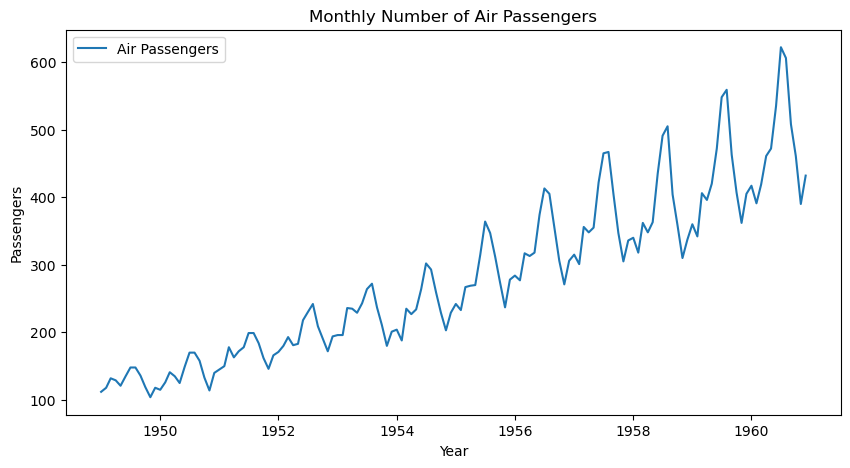

C:\Users\ashim\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0652 - val_loss: 0.0582
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0285 - val_loss: 0.0807
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0216 - val_loss: 0.0809
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - val_loss: 0.0297
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0123 - val_loss: 0.0272
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0098 - val_loss: 0.0411
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0089 - val_loss: 0.0285
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0076 - val_loss: 0.0220
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0071 - val_loss: 0.0244
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0064 - val_loss: 0.0231
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - val_loss: 0.0196
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - val_loss: 0.0210
E

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.1007 - val_loss: 0.2506
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0353 - val_loss: 0.0721
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0149 - val_loss: 0.0263
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0172 - val_loss: 0.0282
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0111 - val_loss: 0.0410
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - val_loss: 0.0394
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0102 - val_loss: 0.0311
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0091 - val_loss: 0.0277
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - val_loss: 0.0269
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0085 - val_loss: 0.0276
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0083 - val_loss: 0.0271
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0081 - val_loss: 0.0270
E

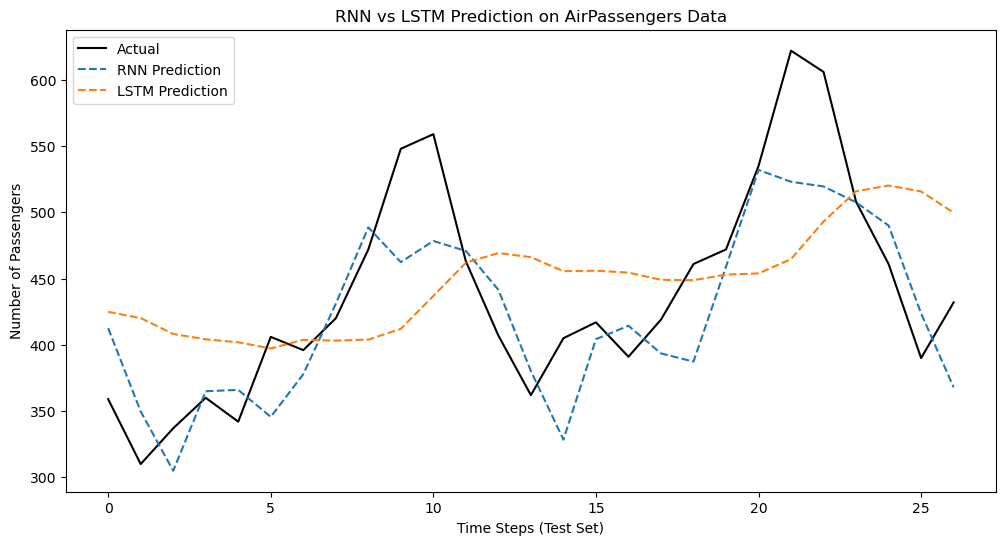


Model Performance Summary:
RNN  -> RMSE: 47.93, MAE: 38.07, MAPE: 8.51%, Accuracy: 91.49%
LSTM -> RMSE: 76.46, MAE: 63.13, MAPE: 14.50%, Accuracy: 85.50%


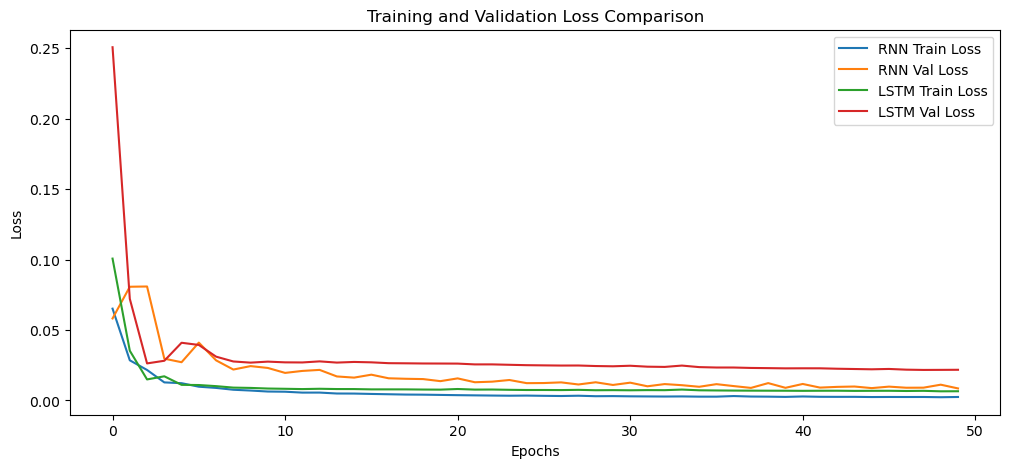


LSTM generally performs better than RNN for time series prediction due to its ability to remember long-term dependencies.


In [5]:
#exp5

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

#Load and Preprocess Data
data = pd.read_csv(r"C:\Users\ashim\Downloads\archive (2)\AirPassengers.csv")

# Rename for clarity
data.columns = ['Month', 'Passengers']

# Convert to datetime and set index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot original data
plt.figure(figsize=(10, 5))
plt.plot(data, label="Air Passengers")
plt.title("Monthly Number of Air Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Extract values and scale
values = data['Passengers'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)

# Function to create sequences
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i+time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_data, time_steps)

# Reshape for RNN/LSTM input: [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split train/test (80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build and Train RNN Model
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(time_steps, 1)),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.summary()

history_rnn = rnn_model.fit(X_train, y_train, epochs=50, batch_size=16,
                            validation_data=(X_test, y_test), verbose=1)

# Build and Train LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(time_steps, 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

history_lstm = lstm_model.fit(X_train, y_train, epochs=50, batch_size=16,
                              validation_data=(X_test, y_test), verbose=1)

# Evaluate & Compare Results
# Predict
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)

# Inverse transform to original scale
rnn_pred = scaler.inverse_transform(rnn_pred)
lstm_pred = scaler.inverse_transform(lstm_pred)
y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_true, label="Actual", color='black')
plt.plot(rnn_pred, label="RNN Prediction", linestyle='--')
plt.plot(lstm_pred, label="LSTM Prediction", linestyle='--')
plt.title("RNN vs LSTM Prediction on AirPassengers Data")
plt.xlabel("Time Steps (Test Set)")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

#Compute Evaluation Metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    return rmse, mae, mape, accuracy

rnn_rmse, rnn_mae, rnn_mape, rnn_acc = evaluate_model(y_test_true, rnn_pred)
lstm_rmse, lstm_mae, lstm_mape, lstm_acc = evaluate_model(y_test_true, lstm_pred)

print("\nModel Performance Summary:")
print(f"RNN  -> RMSE: {rnn_rmse:.2f}, MAE: {rnn_mae:.2f}, MAPE: {rnn_mape:.2f}%, Accuracy: {rnn_acc:.2f}%")
print(f"LSTM -> RMSE: {lstm_rmse:.2f}, MAE: {lstm_mae:.2f}, MAPE: {lstm_mape:.2f}%, Accuracy: {lstm_acc:.2f}%")

# Plot Training Loss Curves
plt.figure(figsize=(12,5))
plt.plot(history_rnn.history['loss'], label='RNN Train Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Val Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Conclusion
print("\nLSTM generally performs better than RNN for time series prediction due to its ability to remember long-term dependencies.")


In [4]:
# STEP 1: Imports
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# STEP 2: Load Dataset
file_path = r"C:\Users\ashim\Downloads\archive (5)\training.1600000.processed.noemoticon.csv"
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv(file_path, encoding='latin-1', names=columns)

# Keep only target and text columns
df = df[['target', 'text']]

# Convert target: 0 = Negative, 4 = Positive → make it 0 and 1
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

print("Dataset loaded successfully!")
print(df.head())

# STEP 3: Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)  # remove mentions
    text = re.sub(r"#[A-Za-z0-9_]+", "", text)  # remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)  # remove punctuation/numbers
    return text

df['clean_text'] = df['text'].apply(clean_text)

# STEP 4: Prepare Data
X = df['clean_text'].values
y = df['target'].values

# Split data (small subset for faster training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization
vocab_size = 15000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
maxlen = 50
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')

print("Text tokenized and padded successfully!")

# STEP 5: Build RNN Model
rnn_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    Bidirectional(SimpleRNN(128, dropout=0.3, recurrent_dropout=0.2)),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
print("\nRNN Model Summary:")
rnn_model.summary()


# STEP 6: Train RNN Model
rnn_history = rnn_model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=256,
    validation_data=(X_test_pad, y_test),
    verbose=1
)

# STEP 7: Evaluate RNN
rnn_loss, rnn_acc = rnn_model.evaluate(X_test_pad, y_test, verbose=0)
print(f"\nRNN Test Accuracy: {rnn_acc * 100:.2f}%")

# STEP 8: Build LSTM Model
lstm_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.2)),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
print("\nLSTM Model Summary:")
lstm_model.summary()

# STEP 9: Train LSTM Model
lstm_history = lstm_model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=256,
    validation_data=(X_test_pad, y_test),
    verbose=1
)

# STEP 10: Evaluate LSTM
lstm_loss, lstm_acc = lstm_model.evaluate(X_test_pad, y_test, verbose=0)
print(f"\nLSTM Test Accuracy: {lstm_acc * 100:.2f}%")


✅ Dataset loaded successfully!
   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....
✅ Text tokenized and padded successfully!

🧠 RNN Model Summary:


C:\Users\ashim\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 402s 80ms/step - accuracy: 0.7421 - loss: 0.5094 - val_accuracy: 0.7985 - val_loss: 0.4386
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 923s 185ms/step - accuracy: 0.7990 - loss: 0.4430 - val_accuracy: 0.8051 - val_loss: 0.4251
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 359s 72ms/step - accuracy: 0.8044 - loss: 0.4315 - val_accuracy: 0.8061 - val_loss: 0.4214
Epoch 4/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 377s 75ms/step - accuracy: 0.8076 - loss: 0.4253 - val_accuracy: 0.8090 - val_loss: 0.4173
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 1104s 221ms/step - accuracy: 0.8100 - loss: 0.4221 - val_accuracy: 0.8092 - val_loss: 0.4185

✅ RNN Test Accuracy: 80.92%

🧠 LSTM Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3105s 620ms/step - accuracy: 0.8014 - loss: 0.4295 - val_accuracy: 0.8178 - val_loss: 0.3986
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3067s 613ms/step - accuracy: 0.8233 - loss: 0.3915 - val_accuracy: 0.8226 - val_loss: 0.3896
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2741s 548ms/step - accuracy: 0.8317 - loss: 0.3753 - val_accuracy: 0.8253 - val_loss: 0.3860
Epoch 4/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2621s 524ms/step - accuracy: 0.8387 - loss: 0.3617 - val_accuracy: 0.8271 - val_loss: 0.3845
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2653s 531ms/step - accuracy: 0.8448 - loss: 0.3502 - val_accuracy: 0.8269 - val_loss: 0.3897

✅ LSTM Test Accuracy: 82.69%


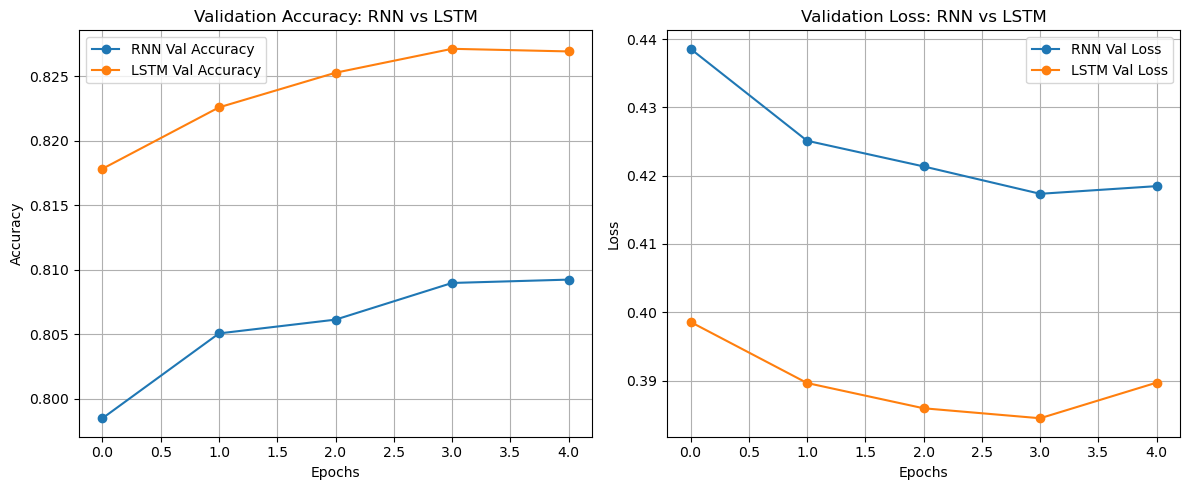


Model Performance Summary:
RNN Accuracy:  80.92%
LSTM Accuracy: 82.69%


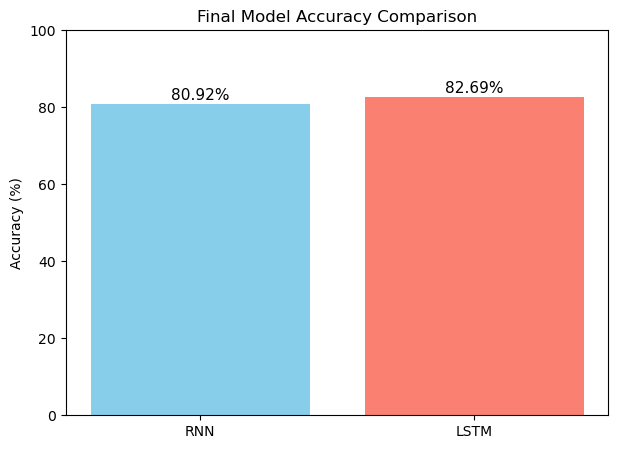

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step

Review: I absolutely loved this movie! It was amazing and emotional.
RNN  → Positive (0.685)
LSTM → Positive (0.991)

Review: This film was terrible. I regret watching it.
RNN  → Negative (0.058)
LSTM → Negative (0.027)

Conclusion:
LSTM generally performs better than RNN for NLP sentiment tasks because it retains long-term dependencies and handles complex contextual relationships more effectively.


In [7]:
# STEP 11: Visualization and Comparison
import matplotlib.pyplot as plt

# Compare Accuracy and Loss
plt.figure(figsize=(12, 5))

# Validation Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['val_accuracy'], label='RNN Val Accuracy', marker='o')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Val Accuracy', marker='o')
plt.title('Validation Accuracy: RNN vs LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Validation Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['val_loss'], label='RNN Val Loss', marker='o')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss', marker='o')
plt.title('Validation Loss: RNN vs LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# STEP 12: Compare Final Performance
print("\nModel Performance Summary:")
print(f"RNN Accuracy:  {rnn_acc*100:.2f}%")
print(f"LSTM Accuracy: {lstm_acc*100:.2f}%")

# Bar Chart Comparison
plt.figure(figsize=(7,5))
plt.bar(['RNN', 'LSTM'], [rnn_acc*100, lstm_acc*100], color=['skyblue', 'salmon'])
plt.title("Final Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
for i, val in enumerate([rnn_acc*100, lstm_acc*100]):
    plt.text(i, val+1, f"{val:.2f}%", ha='center', fontsize=11)
plt.show()

# STEP 13: Prediction Demonstration
sample_texts = [
    "I absolutely loved this movie! It was amazing and emotional.",
    "This film was terrible. I regret watching it."
]

# Clean and preprocess new text
def preprocess_text(texts):
    cleaned = [clean_text(t) for t in texts]
    seq = tokenizer.texts_to_sequences(cleaned)
    pad = pad_sequences(seq, maxlen=maxlen, padding='post', truncating='post')
    return pad

sample_seq = preprocess_text(sample_texts)

# Predictions
rnn_preds = rnn_model.predict(sample_seq)
lstm_preds = lstm_model.predict(sample_seq)

for i, text in enumerate(sample_texts):
    print(f"\nReview: {text}")
    print(f"RNN  → {'Positive' if rnn_preds[i]>0.5 else 'Negative'} ({rnn_preds[i][0]:.3f})")
    print(f"LSTM → {'Positive' if lstm_preds[i]>0.5 else 'Negative'} ({lstm_preds[i][0]:.3f})")


# STEP 14: Conclusion
print("\nConclusion:")
print("LSTM generally performs better than RNN for NLP sentiment tasks because it retains long-term dependencies and handles complex contextual relationships more effectively.")


In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Step 1: Base model (pretrained MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False  # freeze base layers

# Step 2: Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Step 3: Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1045s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 804s 779ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 869s 842ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 864s 837ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# STEP 1: Point directly to the PlantVillage folder inside your dataset
data_dir = r"C:\Users\ashim\Downloads\archive (8)\PlantVillage"   # <-- this folder must contain all the class folders like Tomato___Healthy etc.

# STEP 2: Create ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# STEP 3: Create train and validation generators
train_gen = train_datagen.flow_from_directory(
    data_dir, 
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    data_dir, 
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# STEP 4: Verify number of detected classes
print("Number of classes detected:", train_gen.num_classes)
print("Class labels:", train_gen.class_indices)


Found 33027 images belonging to 16 classes.
Found 8249 images belonging to 16 classes.
Number of classes detected: 16
Class labels: {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'PlantVillage': 2, 'Potato___Early_blight': 3, 'Potato___Late_blight': 4, 'Potato___healthy': 5, 'Tomato_Bacterial_spot': 6, 'Tomato_Early_blight': 7, 'Tomato_Late_blight': 8, 'Tomato_Leaf_Mold': 9, 'Tomato_Septoria_leaf_spot': 10, 'Tomato_Spider_mites_Two_spotted_spider_mite': 11, 'Tomato__Target_Spot': 12, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 13, 'Tomato__Tomato_mosaic_virus': 14, 'Tomato_healthy': 15}


In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define number of classes automatically
num_classes = train_gen.num_classes

# Base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False

# Add classifier head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train quickly for 3–5 epochs
early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=3,   # fast training
    callbacks=[early_stop],
    verbose=1
)

# Evaluate performance
val_loss, val_acc = model.evaluate(val_gen)
print(f"\n✅ Validation Accuracy: {val_acc*100:.2f}%")


C:\Users\ashim\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
517/517 ━━━━━━━━━━━━━━━━━━━━ 515s 980ms/step - accuracy: 0.3805 - loss: 1.9872 - val_accuracy: 0.6980 - val_loss: 1.0985
Epoch 2/3
517/517 ━━━━━━━━━━━━━━━━━━━━ 722s 1s/step - accuracy: 0.6097 - loss: 1.2379 - val_accuracy: 0.7523 - val_loss: 0.8031
Epoch 3/3
517/517 ━━━━━━━━━━━━━━━━━━━━ 402s 777ms/step - accuracy: 0.6718 - loss: 1.0137 - val_accuracy: 0.7872 - val_loss: 0.6711
129/129 ━━━━━━━━━━━━━━━━━━━━ 76s 589ms/step - accuracy: 0.7914 - loss: 0.6670

✅ Validation Accuracy: 79.14%


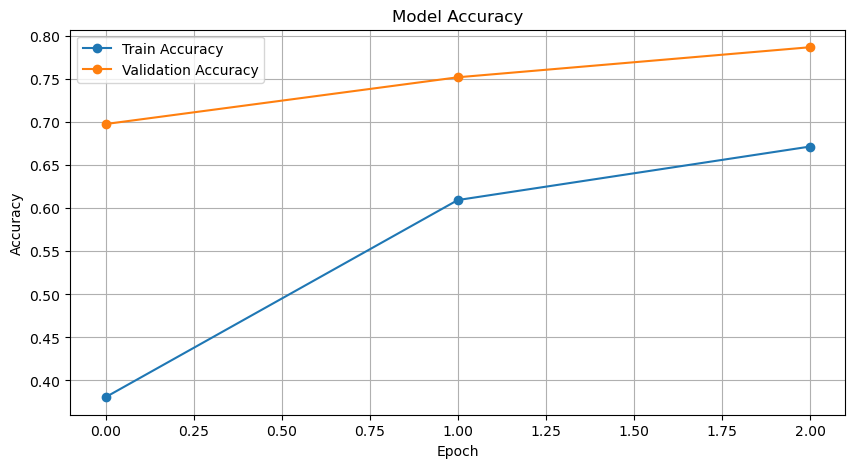

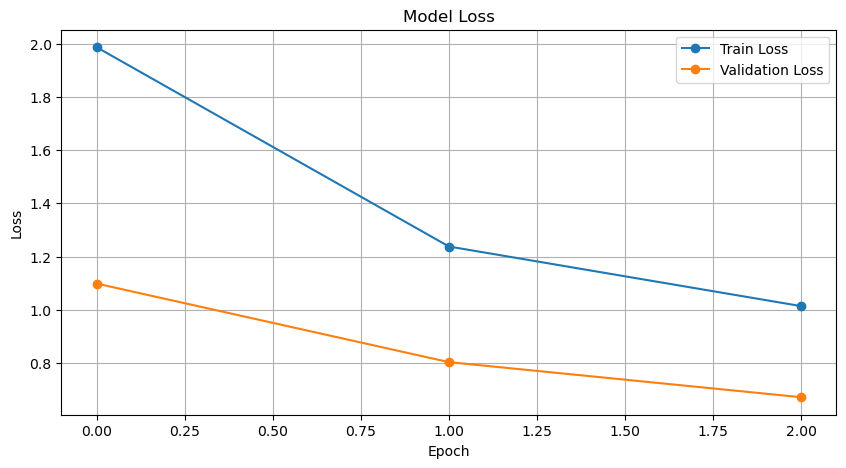

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Detected classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


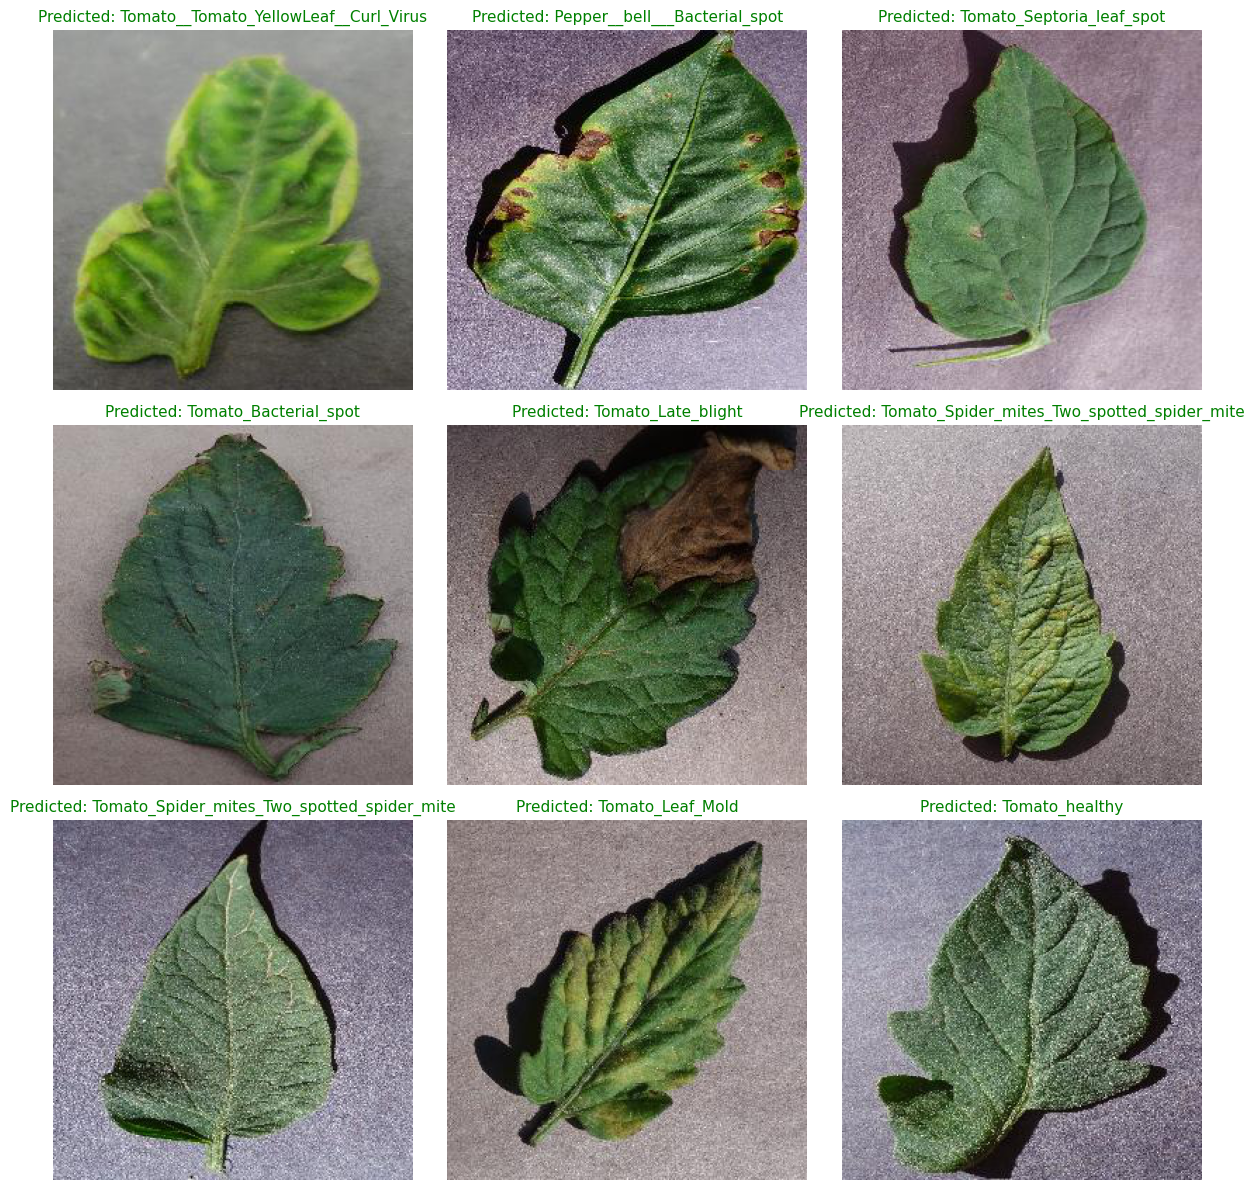

In [25]:
import numpy as np, random
from tensorflow.keras.preprocessing import image

class_labels = list(val_gen.class_indices.keys())
print("Detected classes:", class_labels)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i in range(9):
    random_index = random.randint(0, len(val_gen.filepaths) - 1)
    img_path = val_gen.filepaths[random_index]
    
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
    
    axes[i//3, i%3].imshow(plt.imread(img_path))
    axes[i//3, i%3].set_title(f"Predicted: {predicted_label}", fontsize=11, color='green')
    axes[i//3, i%3].axis('off')

plt.tight_layout()
plt.show()


In [26]:
# Unfreeze last 20 layers of MobileNetV2
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=2,
    verbose=1
)

val_loss, val_acc = model.evaluate(val_gen)
print(f"\n🔹 Fine-tuned Validation Accuracy: {val_acc*100:.2f}%")


Epoch 1/2
517/517 ━━━━━━━━━━━━━━━━━━━━ 450s 856ms/step - accuracy: 0.6394 - loss: 1.1217 - val_accuracy: 0.7754 - val_loss: 0.6650
Epoch 2/2
517/517 ━━━━━━━━━━━━━━━━━━━━ 477s 922ms/step - accuracy: 0.7436 - loss: 0.7851 - val_accuracy: 0.8059 - val_loss: 0.5853
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 638ms/step - accuracy: 0.8091 - loss: 0.5842

🔹 Fine-tuned Validation Accuracy: 80.91%


In [28]:
model.save("Crop_Disease_Detection_MobileNetV2_Final.h5")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model (make sure this file exists)
model = load_model("Crop_Disease_Detection_MobileNetV2_Final.h5")

# Class labels (same order as your dataset folders)
class_labels = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
                'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy',
                'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight',
                'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
                'Tomato_Spider_mites_Two_spotted_spider_mite',
                'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
                'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

# Create GUI window
root = tk.Tk()
root.title("Crop Disease Detection System")
root.geometry("700x600")
root.configure(bg="#e0f7fa")

# Function to open image and predict
def upload_image():
    file_path = filedialog.askopenfilename()
    if not file_path:
        return
    
    # Load and preprocess image
    img = image.load_img(file_path, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    predicted_label = class_labels[predicted_class]

    # Display image
    img_display = Image.open(file_path)
    img_display = img_display.resize((300, 300))
    img_tk = ImageTk.PhotoImage(img_display)
    panel.config(image=img_tk)
    panel.image = img_tk

    # Show result
    result_label.config(
        text=f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%",
        fg="green",
        font=("Arial", 14, "bold")
    )

# GUI layout
title_label = tk.Label(root, text="🌿 Crop Disease Detection using MobileNetV2 🌿", 
                       bg="#00796b", fg="white", font=("Arial", 16, "bold"))
title_label.pack(pady=10, fill="x")

upload_button = tk.Button(root, text="Upload Leaf Image", command=upload_image,
                          bg="#004d40", fg="white", font=("Arial", 12, "bold"))
upload_button.pack(pady=15)

panel = tk.Label(root, bg="#e0f7fa")
panel.pack(pady=10)

result_label = tk.Label(root, text="", bg="#e0f7fa")
result_label.pack(pady=20)

root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step
